In [1]:
from google.colab import drive

import pandas as pd
import numpy as np
import os

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [2]:
book_path = "/content/drive/MyDrive/Colab Titanic/train.csv"
train_data = pd.read_csv(book_path)

# Explore data

In [3]:
train_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [4]:
train_data.shape

(891, 12)

In [5]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Let's add the missing ages

In [7]:
mean_age = round(train_data['Age'].mean())
train_data.Age.fillna(value=mean_age, inplace=True)

## What about the missing cabin values ?

In [8]:
train_data.Pclass.nunique()

3

In [9]:
tmp = train_data[['Cabin', 'Pclass']].dropna()
print(f"Class 1 cabins : {tmp['Pclass'][tmp['Pclass'] == 1].sum()}")
print(f"Class 2 cabins : {tmp['Pclass'][tmp['Pclass'] == 2].sum()}")
print(f"Class 3 cabins : {tmp['Pclass'][tmp['Pclass'] == 3].sum()}")

Class 1 cabins : 176
Class 2 cabins : 32
Class 3 cabins : 36


In [10]:
train_data.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

A lot of cabin numbers are missing and it seems that everyone had one. It also seems that Pclass is irrelevant in wheter the cabin number is missing or not. So let's remove the column

In [11]:
train_data=train_data.drop(columns='Cabin')

## What about Ticket Number ?

In [12]:
train_data.shape

(891, 11)

In [13]:
train_data['Ticket'].duplicated().sum()

210

In [14]:
# train_data['Ticket'].fillna(value='no ticket', inplace=True)

In [15]:
tmp=train_data[['Survived', 'Ticket']]
print(f"Number of duplicated ticket survival : {tmp.Ticket.duplicated().loc[tmp['Survived']==1].sum()}")
print(f"Number of duplicated ticket death : {tmp.Ticket.duplicated().loc[tmp['Survived']==0].sum()}")

Number of duplicated ticket survival : 103
Number of duplicated ticket death : 107


whether a ticket number is duplicated or not doesn't impact survival rate, but because they intuitively do not hold any relevance and for preprocessing reasons, let's remove them.

In [16]:
train_data=train_data.drop(columns='Ticket')

## Let's look at fare

Text(0.5, 1.0, 'Survivor fare')

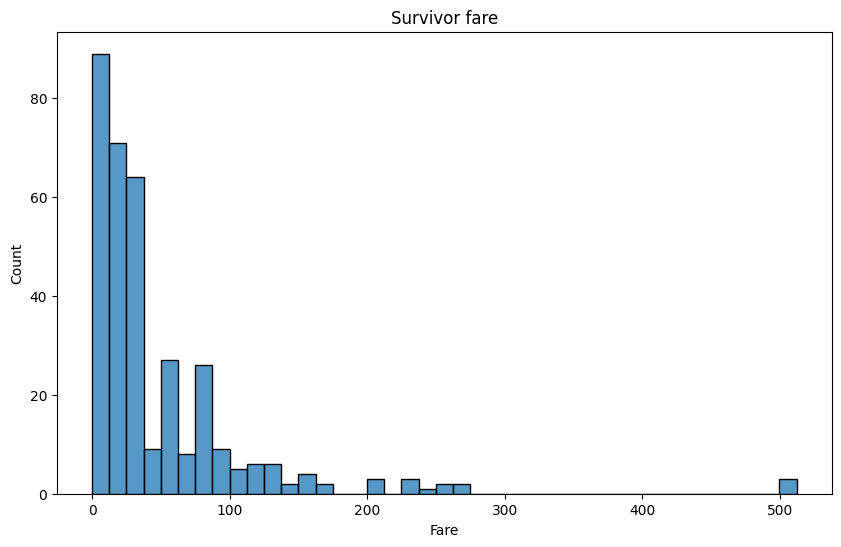

In [17]:
plt.figure(figsize=(10,6))
sns.histplot(data=train_data[['Survived', 'Fare']].loc[train_data['Survived']==1], x='Fare')
plt.title('Survivor fare')

## Place of embarcation

In [18]:
embarked_mode = train_data['Embarked'].mode()[0]

In [19]:
train_data['Embarked'].fillna(value=embarked_mode, inplace=True)

In [20]:
train_data[['Survived', 'Embarked']].groupby('Embarked').sum() #number of survivals per city of embarcation

,Survived
Embarked,
C,93
Q,30
S,219


## Names

For the same reasons as Ticket, let's remove the Age column

In [21]:
train_data=train_data.drop(columns='Name')

In [22]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')

# Pipeline
(to preprocess test data identically)

In [23]:
### Preprocessing imports ###
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_selector
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


In [24]:
# Discriminating columns by dtype
num_col = make_column_selector(dtype_include=['int64', 'float64'])
obj_col = make_column_selector(dtype_include=['object'])

# Pipeline creation
num_transformer = Pipeline([('MinMax Scaler', MinMaxScaler())])
obj_transformer = Pipeline([('Encoder', OneHotEncoder(handle_unknown='ignore'))])

basic_pipeline=ColumnTransformer([
    ('MinMax Scaler', num_transformer, num_col),
    ('Encoder', obj_transformer, obj_col)
])
basic_pipeline

ColumnTransformer(transformers=[('MinMax Scaler',
                                 Pipeline(steps=[('MinMax Scaler',
                                                  MinMaxScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7e2b23e580d0>),
                                ('Encoder',
                                 Pipeline(steps=[('Encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7e2b23e2bd00>)])

In [25]:
train_data.shape

(891, 9)

In [26]:
from sklearn.model_selection import train_test_split

X = train_data.drop(columns='Survived')
y = train_data['Survived']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.3, random_state = 42
)

In [27]:
X_train_preproc = basic_pipeline.fit_transform(X_train)

In [28]:
column_names=basic_pipeline.get_feature_names_out()
new_column_names=[]

for n in column_names:
  if "MinMax Scaler__" in n:
    n=n.replace("MinMax Scaler__", "")
  else:
    n=n.replace("Encoder__", "")
  new_column_names.append(n)

new_column_names

['PassengerId',
 'Pclass',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Sex_female',
 'Sex_male',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S']

In [29]:
X_train_preproc_df=pd.DataFrame(data=X_train_preproc, columns=new_column_names)

# Model

**Baseline = 0.5**

## Model 1 : Random Forest Classifier

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate

forest = RandomForestClassifier(max_depth=5)
forest.fit(X_train_preproc_df, y_train)

cv_results = cross_validate(forest, X_train_preproc_df, y_train, scoring = "accuracy", cv=5)
cv_results

{'fit_time': array([0.15417194, 0.153929  , 0.16113687, 0.16682458, 0.16603661]),
 'score_time': array([0.00785613, 0.00877142, 0.00836587, 0.00920033, 0.00778818]),
 'test_score': array([0.784     , 0.912     , 0.768     , 0.79032258, 0.83870968])}

In [31]:
rfc_score = cv_results['test_score'].mean()

## Model 2 : Adaboost

In [32]:
from sklearn.ensemble import AdaBoostClassifier

adaboost = AdaBoostClassifier(forest)

cv_results = cross_validate(adaboost, X_train_preproc_df, y_train, scoring = "accuracy", cv=5)
cv_results

{'fit_time': array([8.17382646, 8.03628612, 8.06597233, 8.05649233, 8.21871424]),
 'score_time': array([0.34353948, 0.31330991, 0.30102205, 0.29809546, 0.30028677]),
 'test_score': array([0.792     , 0.824     , 0.736     , 0.7983871 , 0.83064516])}

In [33]:
ada_score=cv_results['test_score'].mean()

In [34]:
ada_score > rfc_score

False

## model 3 : KNeighbours Classifier

In [35]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors=5)

model_knn.fit(X_train_preproc_df, y_train)

knn_cv_results = cross_validate(model_knn, X_train_preproc_df, y_train, scoring = "accuracy", cv=5)

knn_score=knn_cv_results['test_score'].mean()


In [36]:
knn_score>rfc_score

False

## model 4 : stacking estimators

In [37]:
knn_score>ada_score

False

Top model so far :
1. Random Forest Classifier
2. Adaboost
3. KNN

In [38]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression

ensemble = VotingClassifier(estimators = [("rfc", forest),
                                            ("ada", adaboost),
                                            ("knn", model_knn)],
                            voting = 'soft',
                            weights = [1, 1, 1]
                            )

In [39]:
X_test_preproc = basic_pipeline.fit_transform(X_test)

In [40]:
X_test_preproc_df=pd.DataFrame(X_test_preproc, columns=new_column_names)

In [41]:
stack_score=ensemble.fit(X_train_preproc_df, y_train).score(X_test_preproc_df, y_test)

In [42]:
stack_score > rfc_score

False

Let's stop creating models for now. It appears that the Random Forest Classifier is still the best model after the stacking method. Let's fine-tune it !

# Gridsearch

In [43]:
import tensorflow as tf
#Get a handle to the attached TPU. On GCP it will be the CloudTPU itself
resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])
#Connect to the TPU handle and initialise it
tf.config.experimental_connect_to_cluster(resolver)
tf.tpu.experimental.initialize_tpu_system(resolver)

In [45]:
from sklearn.model_selection import GridSearchCV

model = RandomForestClassifier()

grid = {'n_estimators': np.arange(5,300, 1, dtype=int),
        'max_depth': [3, 5, 10, None],
        'min_samples_leaf': np.arange(1, 10, 2),
        }

search = GridSearchCV(
    model,
    grid,
    scoring = 'accuracy',
    cv = 5,
    n_jobs=-1 # parallelize computation
)




In [47]:
strategy = tf.distribute.experimental.TPUStrategy(resolver)
with strategy.scope():
  search.fit(X_train_preproc_df, y_train)

In [48]:
search.best_score_

0.8346580645161291

In [49]:
search.best_params_

{'max_depth': None, 'min_samples_leaf': 3, 'n_estimators': 16}

In [53]:
best_model = RandomForestClassifier(max_depth=None, min_samples_leaf=3, n_estimators=16)

best_model.fit(X_train_preproc_df, y_train)
best_score = best_model.score(X_test_preproc_df, y_test)

In [54]:
best_score>rfc_score

False

Altough best_model score is lower than rfc_score, rfc_score is a mean of cross validation scores. So let's keep the best_score.

In [57]:
import joblib

path = '/content/drive/MyDrive/Colab Titanic/saved_weights_rfc.h5' # change to your path
joblib.dump(best_model, path)

['/content/drive/MyDrive/Colab Titanic/saved_weights_rfc.h5']

# Predict

In [85]:
test_data=pd.read_csv('/content/drive/MyDrive/Colab Titanic/test.csv')

In [87]:
test_data.shape

(418, 11)

In [88]:
X_pred=test_data.drop(columns=['Cabin', 'Ticket', 'Name'])

In [89]:
X_pred_preproc=basic_pipeline.fit_transform(X_pred)

In [92]:
X_pred_preproc

array([[0.        , 1.        , 0.4527232 , ..., 0.        , 1.        ,
        0.        ],
       [0.00239808, 1.        , 0.61756561, ..., 0.        , 0.        ,
        1.        ],
       [0.00479616, 0.5       , 0.8153765 , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.99520384, 1.        , 0.50547277, ..., 0.        , 0.        ,
        1.        ],
       [0.99760192, 1.        ,        nan, ..., 0.        , 0.        ,
        1.        ],
       [1.        , 1.        ,        nan, ..., 1.        , 0.        ,
        0.        ]])

In [95]:
X_pred_preproc_df = pd.DataFrame(X_pred_preproc, columns=new_column_names)

In [98]:
X_pred_preproc_df['Age'].fillna(X_pred_preproc_df['Age'].mean(), inplace=True)
X_pred_preproc_df['Fare'].fillna(X_pred_preproc_df['Fare'].mean(), inplace=True)

In [99]:
predictions=best_model.predict(X_pred_preproc_df)

In [100]:
predictions_df=pd.DataFrame(predictions, columns=['Survived'])

In [101]:
predictions_df['PassengerId']=X_pred['PassengerId']

In [107]:
tmp=predictions_df.sort_values('PassengerId')

In [108]:
predictions_df_vf=tmp.set_index('PassengerId')

In [109]:
predictions_df_vf.to_csv('Titanic_rfc_predictions', index=True)